# Dimensionality Reduction by PCA
- versicolorとvirginicaの分離が難しいことが視覚的に理解できる
- クラスタリング分析で可視化する

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import arviz as az
from sklearn.decomposition import PCA
from scipy.stats import norm, entropy
from sklearn import datasets
from keras.utils import np_utils
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
df_iris = pd.read_csv('./data/raw/iris.csv')

In [46]:
print(df_iris.shape)
df_iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
pca = PCA(n_components=2)
pca.fit(df_iris.iloc[:,0:4].values)
df_iris_pca = pd.DataFrame(np.dot(df_iris.iloc[:,0:4].values, pca.components_.T), columns=['comp_1', 'comp_2'])
df_iris_pca = pd.concat([df_iris_pca, pd.DataFrame(df_iris['species'])], axis=1)

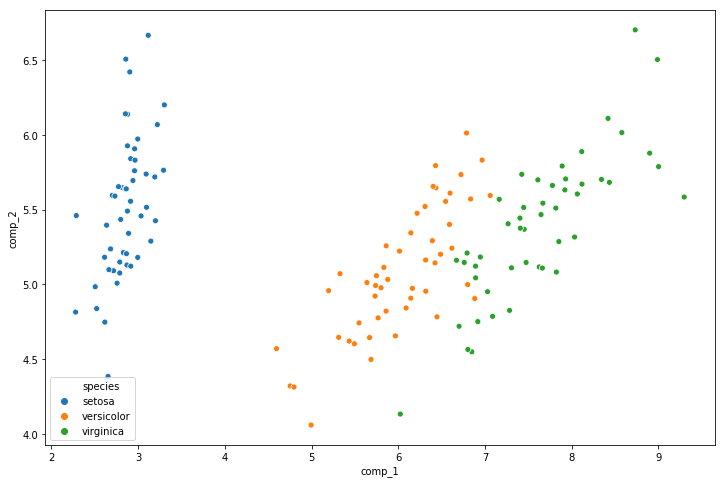

In [5]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_iris_pca['comp_1'], y=df_iris_pca['comp_2'], hue=df_iris_pca['species'])